# 아웃라이어 -- 접속해서 아무것도 안하는 유저들 (던전, 채집, 파티활동 등등)

## 접속해서 그 어떠한 컨텐츠도 즐기지 않는다(퀘스트, 홍문퀘스트 경험치, 던전을 돈 이력이 존재하지 않고 일정 시간만 게임에 접속함) 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [27]:
plt.style.use('ggplot')

In [2]:
X_train1=pd.read_csv('../X_train_final.csv')
X_train1=X_train1.fillna(0)
X_test1=pd.read_csv('../X_test_final.csv')
X_test1=X_test1.fillna(0)
train_label=pd.read_csv('../lite_data/train_label_lite.csv')

In [3]:
detec=pd.concat([train_label,X_train1],axis=1)
detect=detec[detec.group_e==True]

In [32]:
detect.label.value_counts()

2month      7501
month       4946
retained    4322
week        1833
Name: label, dtype: int64

## 이러한 이상치들 또한 라벨의 분포가 다양하나 week가 가장 적다. 즉, 게임 컨텐츠를 전혀 즐기지
## 않아도 이 게임자체에 이탈하지 않고 가끔 게임에 접속하는 유저들인 것이다.


In [ ]:

## xgb부스트가 분류하는데 가장 큰 기여를 한 변수들 top 30
"""
play_pattern_by_partial_sum_retained_prob
play_pattern_by_partial_sum_2month_prob
whisper_chat_MA_2_basic_time
pattern_retained
cnt_dt_max_stat
cnt_dt_median_stat
pattern_2month
whisper_chat_median_stat
whisper_chat_MA_3_basic_time
pattern_month
cnt_dt_min_stat
first_week_cnt_dt
cnt_dt_diff7_time_series
whisper_chat_sum_stat
last_trade_all
whisper_chat_max_stat
play_pattern_by_partial_sum_month_prob
first_week_whisper_chat
trade_InDegCen
cnt_dt_diff_w2_by_last_time_series
differ_min
cnt_dt_diff3_time_series
play_time_Count
cnt_dt_MA_3_time_series
cnt_dt_MA_4_time_series
play_pattern_by_partial_sum_week_prob
cnt_dt_median_time_series
play_time_by_cnt_dt
trade_cnt_by_play_time
cnt_dt_diff5_time_series

"""


## 대부분 접속 패턴이나, 주차별 접속횟수와 관련된 변수들이 많다.

# first_week_cnt_dt( 유저별 첫번째로 접속한 주의 접속횟수)

In [34]:
detect.first_week_cnt_dt.value_counts()

# 1번 접속한 경우가 많음

1.0    4314
4.0    3992
5.0    3532
6.0    2500
3.0    2423
2.0    1412
7.0     429
Name: first_week_cnt_dt, dtype: int64

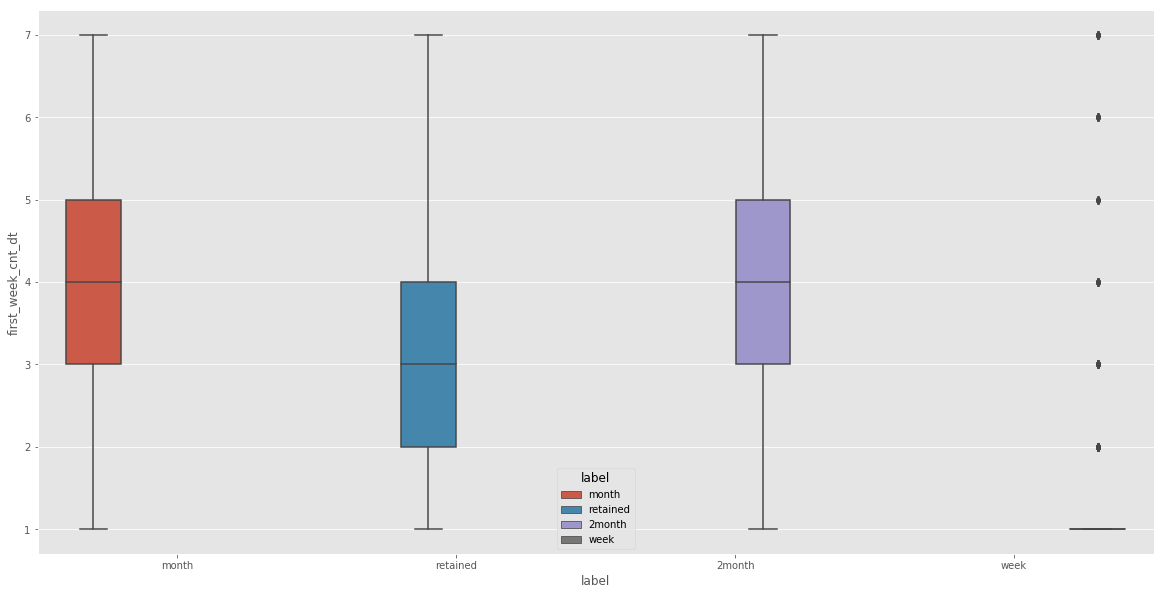

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(x=detect.label,y=detect.first_week_cnt_dt,
               hue=detect.label)#.set_ylim(0,0.025)

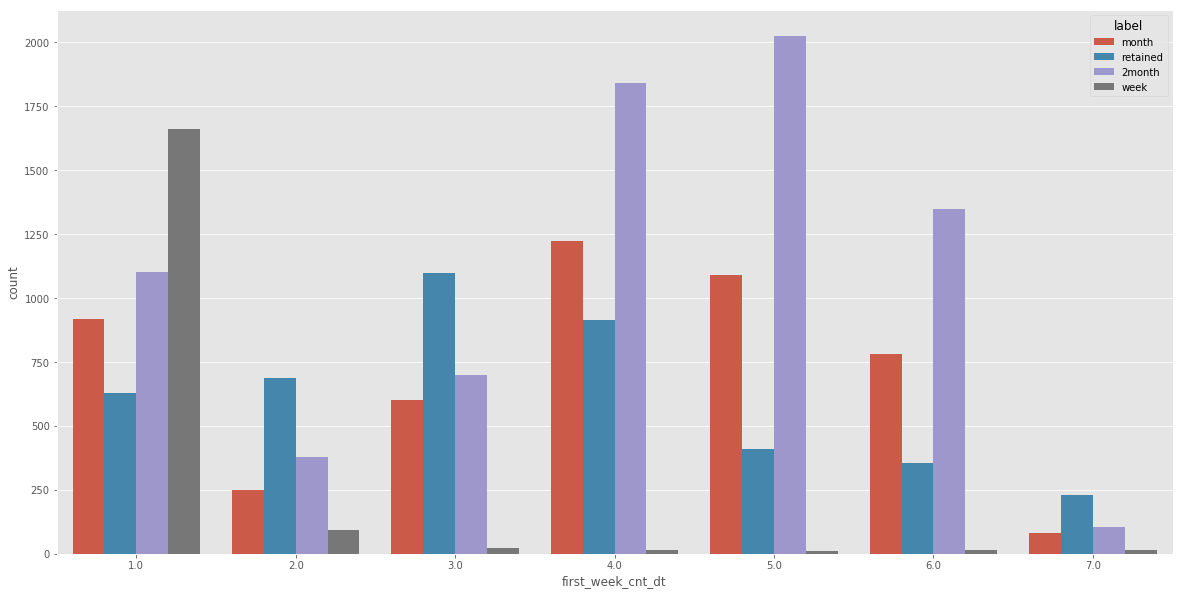

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x=detect.first_week_cnt_dt,
               hue=detect.label)#.set_ylim(0,0.025)

## 대부분의 week 유저는 첫주차에 1번만 접속하고, 그 이상의 횟수는 이상치가 되버림

## month 고객과 2month 유저의 중분위수가 높고 retained 유저가 그뒤를 이음

# cnt_dt_max_stat(주차별 최대 접속 일수)

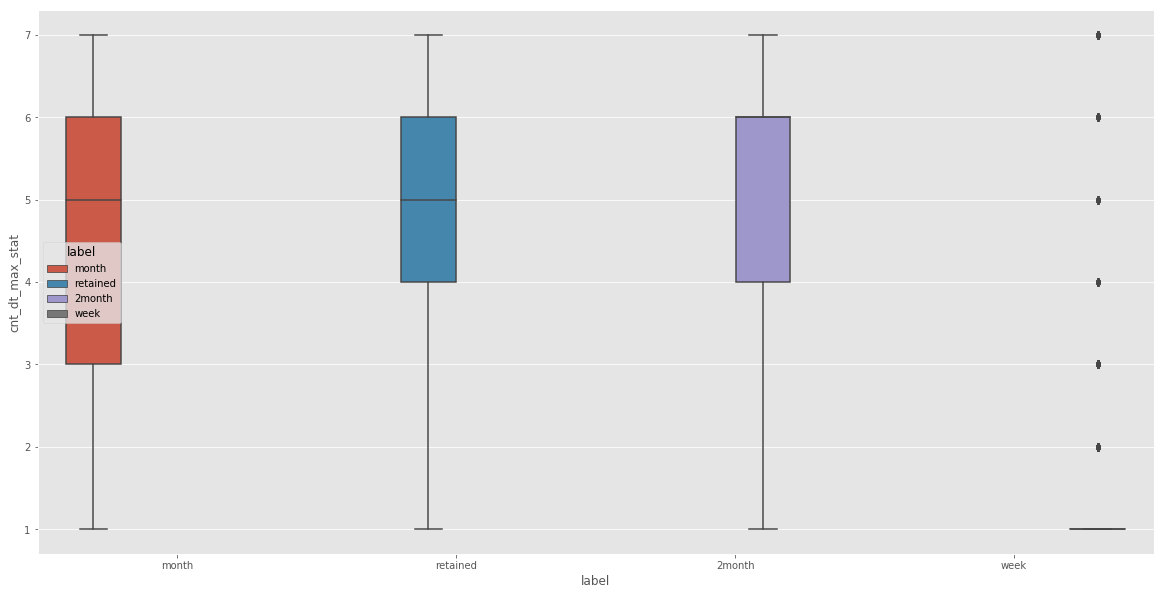

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x=detect.label,y=detect.cnt_dt_max_stat,
               hue=detect.label)#.set_ylim(0,0.025)

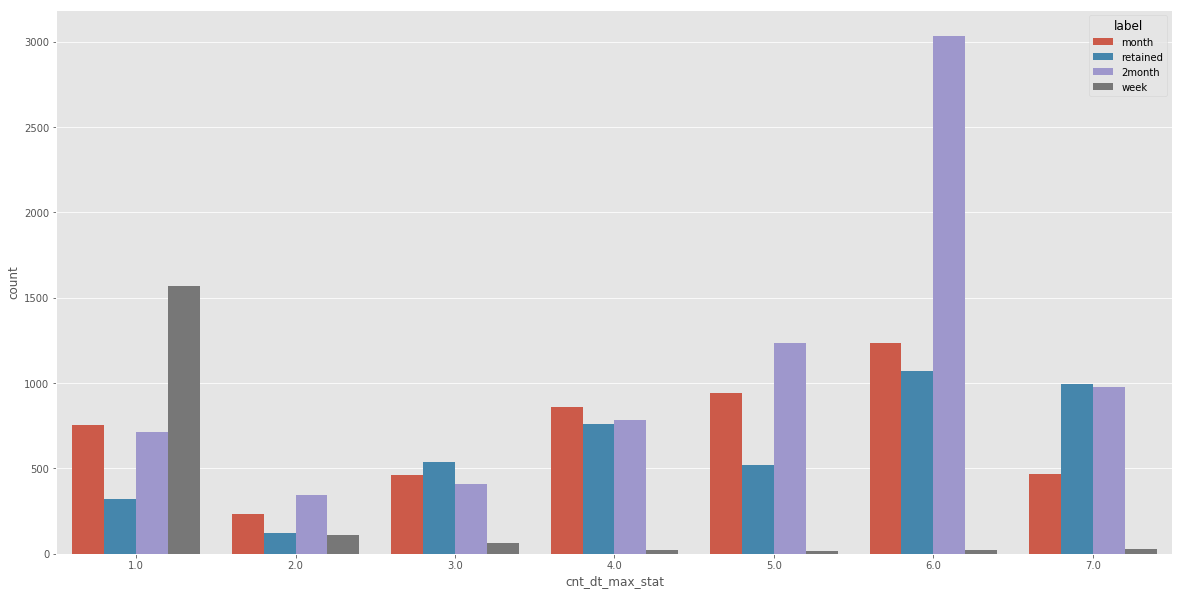

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x=detect.cnt_dt_max_stat,
               hue=detect.label)#.set_ylim(0,0.025)

## 주차별 최대 접속일수도 또한 week가 큰값을 가질수록 비율을 적게 차지한다.

### retained 고객보다 오히려 2month, month 고객들이 주차별 접속횟수 최대값이 더높다.

# cnt_dt_diff7_time_series(7주차와 8주차의 접속 횟수 차)

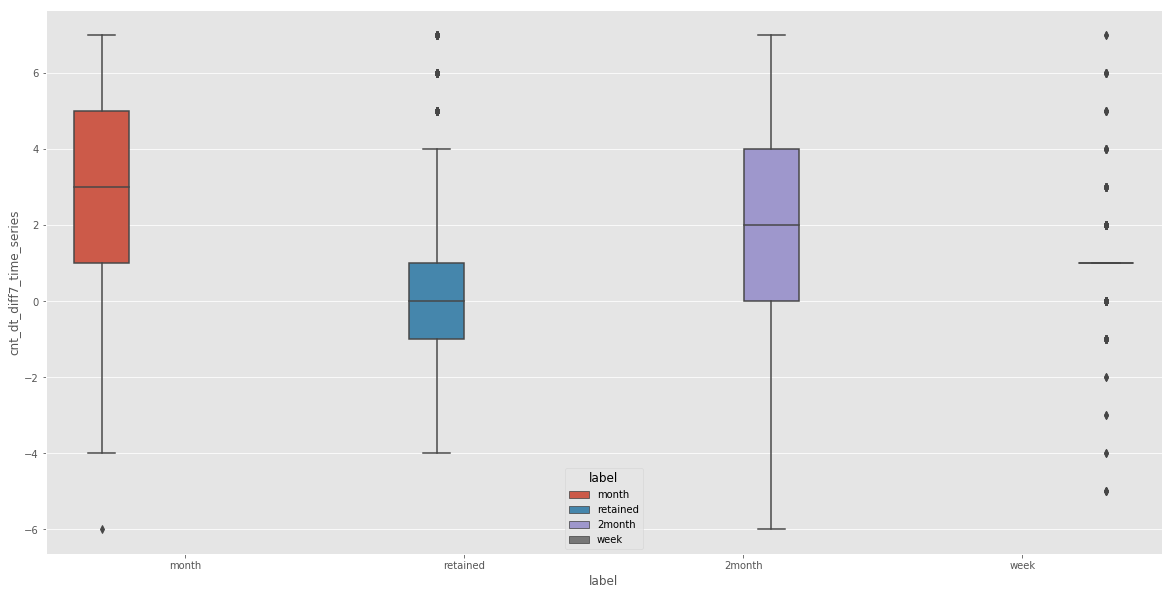

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(x=detect.label,y=detect.cnt_dt_diff7_time_series,
               hue=detect.label)#.set_ylim(0,0.025)

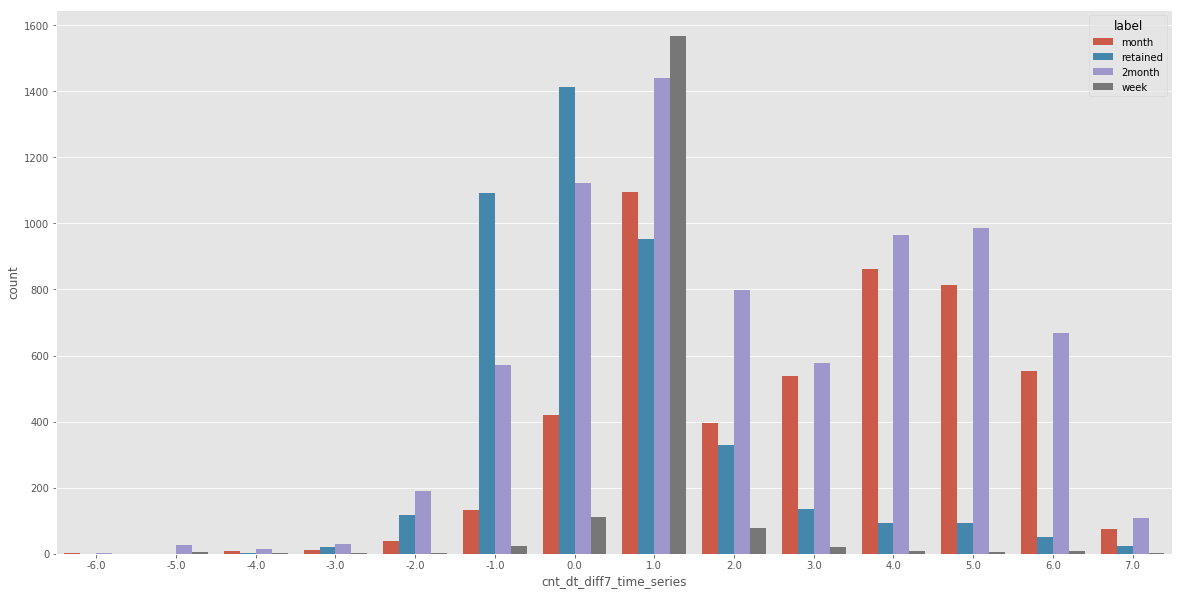

In [50]:
plt.figure(figsize=(20,10))
sns.countplot(x=detect.cnt_dt_diff7_time_series,
               hue=detect.label)#.set_ylim(0,0.025)

## 8주차와 7주차 접속 횟수의 차이는 retained 유저에서는 그렇게 차이가 나지 않는다.

> week 유저들 또한 차이가 별로 나지 않지만 위의 다른 지표에서 본 것 처럼 최대 접속일수가 1인 경우가 많으므로 편차가 적다고 할 수 있다.

### month 유저와 2month 유저들 이 오히려 마지막 주차와 그 전주차의 접속횟수 차가 크다.
> 따라서 비이탈 유저에 비해 이탈 유저들은 접속 횟수가 주차별로 일정하지 않음을 알 수 있다.

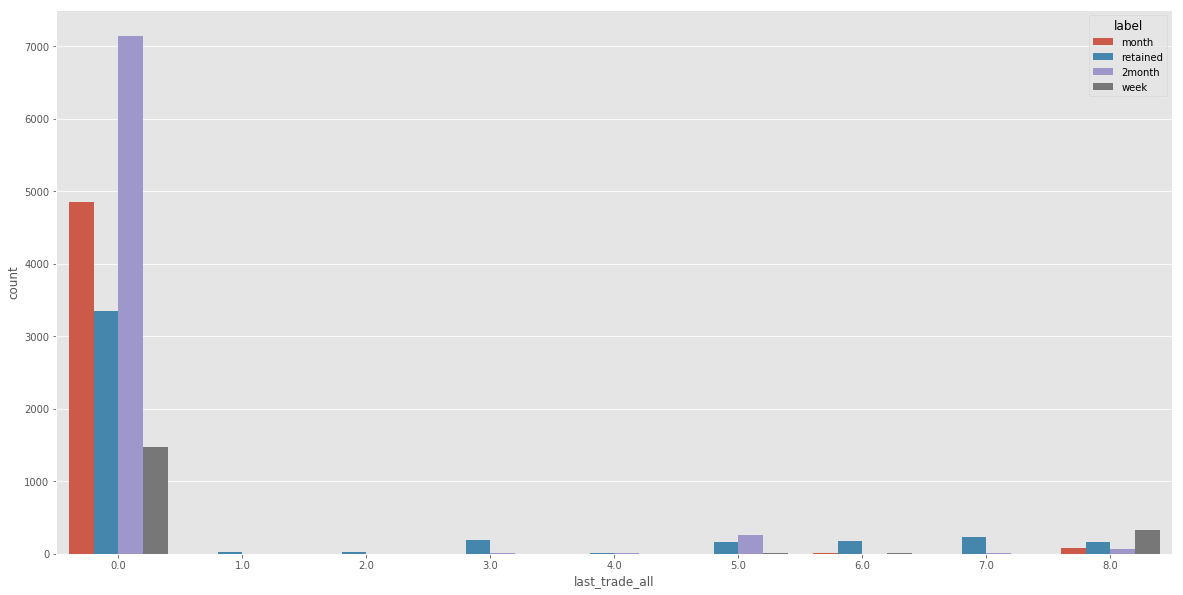

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(x=detect.last_trade_all,
               hue=detect.label)#.set_ylim(0,0.025)

# cnt_dt_diff_w2_by_last_time_series(2주차와 8주차의 접속 횟수 차)

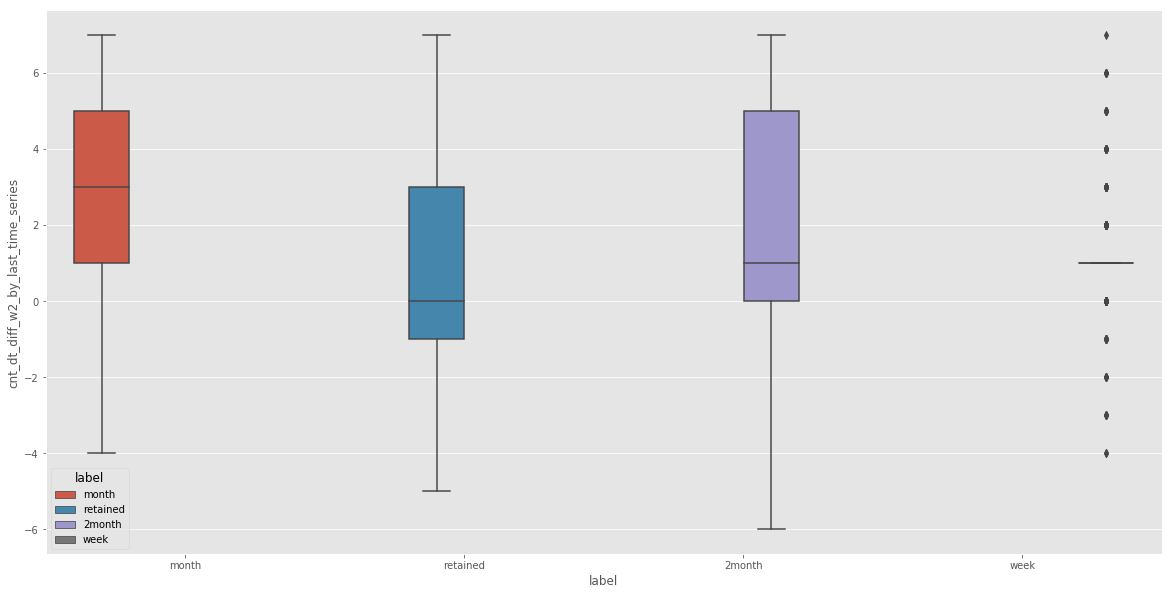

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(x=detect.label,y=detect.cnt_dt_diff_w2_by_last_time_series,
               hue=detect.label)#.set_ylim(0,0.025)

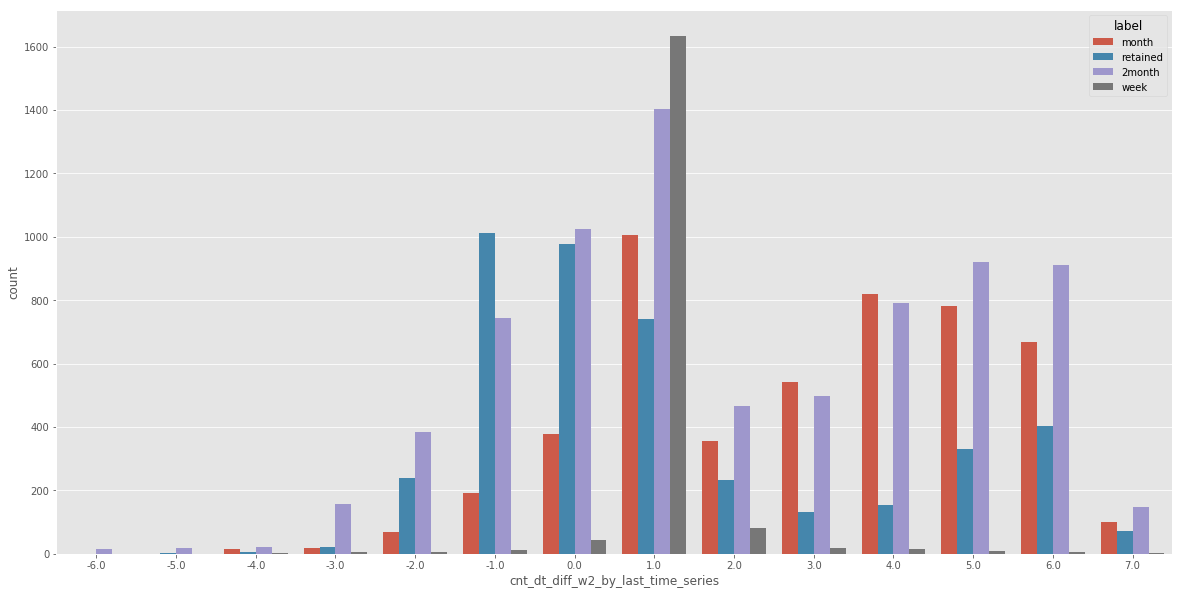

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(x=detect.cnt_dt_diff_w2_by_last_time_series,
               hue=detect.label)#.set_ylim(0,0.025)

## 결론
> 위에서도 본것처럼, 이탈 고객은 비이탈 고객에 비해 주차별 접속횟수 차이가 그렇게 크지 않음을 알 수 있다.

## 추측.. 

## 아마 이 유저들은 이미 블레이드앤 소울 내에 다른 계정을 갖고있어 일일 이벤트나 다른 이

## 벤트에 참여하기 위해 생겨난 부계정이라 추측이 된다.

## 하지만, 과연 유저 이탈, 및 수익 내기 위한 게임 회사에서 이러한 유저들을 다른 클래스로 분류하고 접속 패턴 이외에 서로 다른 특징을 갖고 있다고 확실히 말을 할수 있을지는 의문이 간다. 

## 비록 데이터셋 내에 다른 클래스로 분류 되었지만 결국 게임 내 컨텐츠를 거의 즐기지 않는 '체리피커' 라고 생각 할 수 있다. 

> 특히 이렇게 게임 내에 접속만 하고 아무 컨텐츠도 즐기지 않는 유저들에 대해 보유고객(retained)이라 정의하는 것이 위험하다는 생각이 들었다.

> 하지만 이러한 고객들 또한 비즈니스 적으로 봤을때 입소문을 좋게 낼수 있는 고객이기에 꾸준히 관리하는것이 중요할 수 있다는 생각이 든다.